In [8]:
from text2vec import SentenceModel

In [2]:
model = SentenceModel(r'D:\Projects\text2vec-base-chinese')

2023-04-22 08:38:36.978 | DEBUG    | text2vec.sentence_model:__init__:74 - Use device: cuda


In [3]:
sentences = ['如何更换花呗绑定银行卡', '花呗更改绑定银行卡', 
             '如何办理银行卡', '哈里路大旋风']
embeddings = model.encode(sentences)

In [4]:
print(embeddings)

[[-4.4390789e-04 -2.9734781e-01  8.5790151e-01 ... -5.2770150e-01
  -1.4315721e-01 -1.0007849e-01]
 [ 6.5362066e-01 -7.6667674e-02  9.5962387e-01 ... -6.0122484e-01
  -1.6792282e-03  2.1457718e-01]
 [ 3.3719593e-01 -7.9632360e-01  3.8019526e-01 ... -1.9252342e-01
   7.5160302e-02 -1.6093762e-01]
 [-8.8900603e-02 -2.4561442e-02  4.1167963e-01 ...  1.2363576e+00
  -3.4643823e-01 -7.1788603e-01]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
# PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# t-SNE with perplexity=2
tsne = TSNE(n_components=2, random_state=0, perplexity=2)
embeddings_tsne = tsne.fit_transform(embeddings)

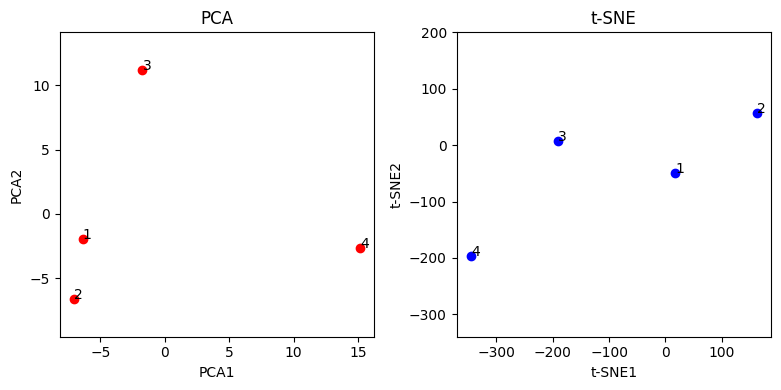

In [9]:
# Labels for the sentences
labels = ['1', '2', '3', '4']

# Plot PCA
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c='r', marker='o')

for i, txt in enumerate(labels):
    plt.annotate(txt, (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA')
plt.axis('equal')

# Plot t-SNE
plt.subplot(122)
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c='b', marker='o')

for i, txt in enumerate(labels):
    plt.annotate(txt, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE')
plt.axis('equal')

plt.tight_layout()
plt.show()